In [154]:
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt

In [238]:
def sharpen(img, sharpen_factor):
    original_image = list(img)
    original_image = np.array(original_image, dtype='int32')
    max_value = 0
    min_value = 255

    for i in range (2,img.shape[0] - 2):
        for j in range (2,img.shape[1] - 2):
            p1 = 0
            p2 = 0
            p3 = 0
            p4 = 0
            p5 = 0
            p6 = 0
            p7 = 0
            p8 = 0
            p9 = 0
            
            p1 = original_image[i-1][j-1]
            p2 = original_image[i-1][j]
            p3 = original_image[i-1][j+1]
            p4 = original_image[i][j-1]
            
            p5 = original_image[i][j]
            
            p6 = original_image[i][j+1]
            p7 = original_image[i+1][j-1]
            p8 = original_image[i+1][j]
            p9 = original_image[i+1][j+1]
            
            new_pixel = 0-p1-p2-p3-p4 +(8*p5) -p6-p7-p8-p9
            
            if new_pixel > max_value:
                max_value = new_pixel
            if new_pixel < min_value:
                min_value = new_pixel

            img[i][j] = new_pixel

    if max_value >= min_value * -1:
        divider = max_value
    else:
        divider = min_value

    for i in range (2,img.shape[0] - 2):
        for j in range (2,img.shape[1] - 2):
            
            new_pixel = img[i][j]

            if new_pixel < 0:
                new_pixel =  (new_pixel / divider) * (sharpen_factor)
            elif new_pixel > 0:
                new_pixel = (new_pixel / divider) * (sharpen_factor)

            new_pixel = original_image[i][j] + new_pixel

            if new_pixel > 255:
                new_pixel = 255
            if new_pixel < 0:
                new_pixel = 0
            
            img[i][j] = new_pixel


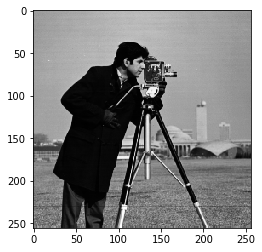

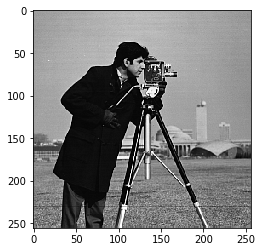

In [241]:
img = Image.open("Cameraman.tif")
img_np = np.array(img, dtype = 'int32')
plt.figure()
plt.imshow(img, cmap="gray")
sharpen_factor = 80
sharpen(img_np, sharpen_factor)
result_image = Image.fromarray(img_np)
result_image = result_image.convert('L')
plt.figure()
plt.imsave("Sharpened.jpg", result_image, cmap='gray')
plt.imshow(result_image, cmap="gray")